In [36]:
# Load the Pandas libraries with alias 'pd' 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("winequalityN.csv") 
print (data.shape)
data = data.dropna()
print (data.shape)
data.head(5)

(6497, 13)
(6463, 13)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(6463, 13)


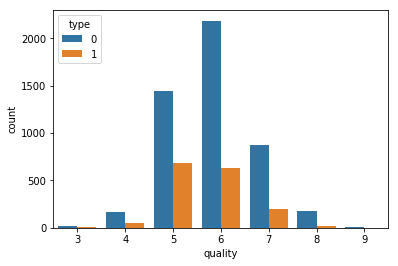

In [37]:
## Replacing categorical variale wine type white to 0 and red to 1
data = data.replace('white', 0)
data = data.replace('red', 1)
print (data.shape)

## Data description - histogram of counts y wine qualityand y wine type
ax = sb.countplot(x="quality", hue="type", data=data)

## Divide data into data and lael
wineData = data.drop(['quality'],axis=1)
#print (wineData)
wineQuality_index = data['quality']
#print (wineQuality_index)



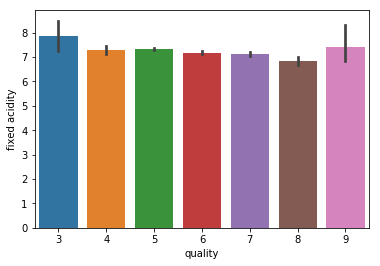

In [38]:
#do plotting first to see how the data columns are distributed in the dataset
sb.barplot(x = 'quality', y = 'fixed acidity', data = data)

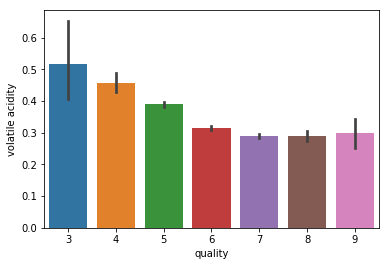

In [39]:
sb.barplot(x = 'quality', y = 'volatile acidity', data = data)

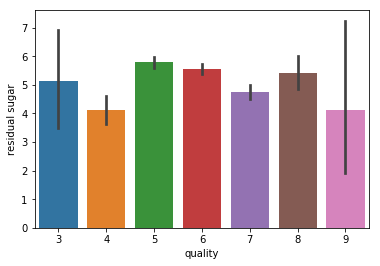

In [41]:
sb.barplot(x = 'quality', y = 'residual sugar', data = data)

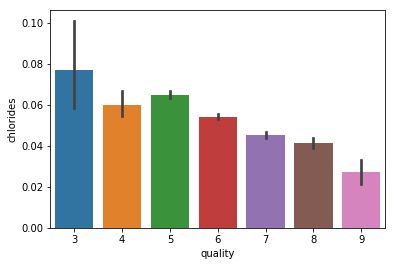

In [42]:
sb.barplot(x = 'quality', y = 'chlorides', data = data)

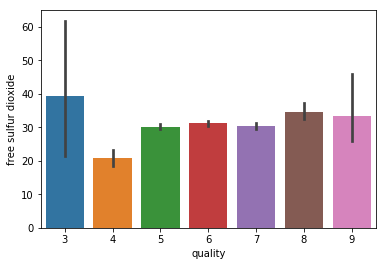

In [44]:
sb.barplot(x = 'quality', y = 'free sulfur dioxide', data = data)

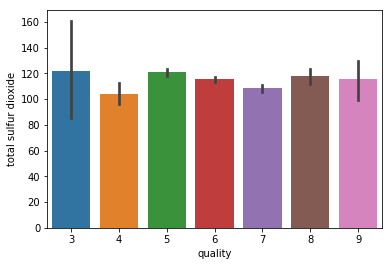

In [45]:
sb.barplot(x = 'quality', y = 'total sulfur dioxide', data = data)

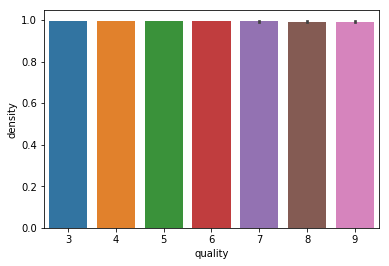

In [46]:
sb.barplot(x = 'quality', y = 'density', data = data)

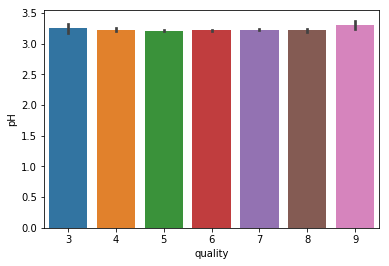

In [47]:
sb.barplot(x = 'quality', y = 'pH', data = data)

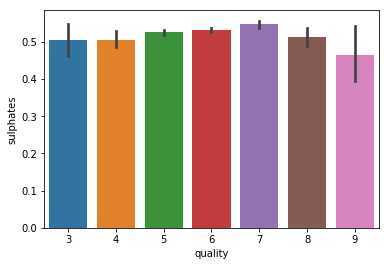

In [48]:
sb.barplot(x = 'quality', y = 'sulphates', data = data)

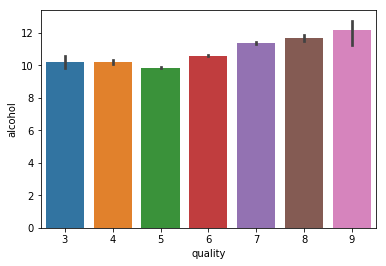

In [60]:
sb.barplot(x = 'quality', y = 'alcohol', data = data)

In [66]:
#using gradient decent classifer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
#from plotting the x vs.'quality', we see that pH and density for all wines are similar, so we can reduce the dimension by deduct these two.
#data = data.drop( ["density"], axis = 1)
#data = data.drop(["pH"], axis = 1)
data.shape
winedata = SGDClassifier(penalty = None)
winedata.fit(X_train, y_train)
pred_wine = winedata.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [69]:
print (classification_report(y_test, pred_wine))
print (confusion_matrix(y_test, pred_wine))

              precision    recall  f1-score   support

           3       0.33      0.18      0.24        11
           4       0.06      0.01      0.02        75
           5       0.42      0.60      0.50       702
           6       0.47      0.26      0.33       946
           7       0.38      0.59      0.46       345
           8       0.09      0.08      0.08        53
           9       0.00      0.00      0.00         1

   micro avg       0.41      0.41      0.41      2133
   macro avg       0.25      0.25      0.23      2133
weighted avg       0.41      0.41      0.39      2133

[[  2   0   5   4   0   0   0]
 [  2   1  45  13  14   0   0]
 [  2   5 424 208  58   5   0]
 [  0  10 436 245 231  24   0]
 [  0   1  88  44 202  10   0]
 [  0   0  12   6  31   4   0]
 [  0   0   0   0   1   0   0]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
#only 41% accurancy, not very good, let's do random rain forest model
from sklearn.ensemble import RandomForestClassifier
rfc_wine = RandomForestClassifier(n_estimators=200)
rfc_wine.fit(X_train, y_train)
pred_rfc_wine = rfc_wine.predict(X_test)

print (classification_report(y_test, pred_wine))
print (confusion_matrix(y_test, pred_wine)) 

              precision    recall  f1-score   support

           3       0.33      0.18      0.24        11
           4       0.06      0.01      0.02        75
           5       0.42      0.60      0.50       702
           6       0.47      0.26      0.33       946
           7       0.38      0.59      0.46       345
           8       0.09      0.08      0.08        53
           9       0.00      0.00      0.00         1

   micro avg       0.41      0.41      0.41      2133
   macro avg       0.25      0.25      0.23      2133
weighted avg       0.41      0.41      0.39      2133

[[  2   0   5   4   0   0   0]
 [  2   1  45  13  14   0   0]
 [  2   5 424 208  58   5   0]
 [  0  10 436 245 231  24   0]
 [  0   1  88  44 202  10   0]
 [  0   0  12   6  31   4   0]
 [  0   0   0   0   1   0   0]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


2133
4330


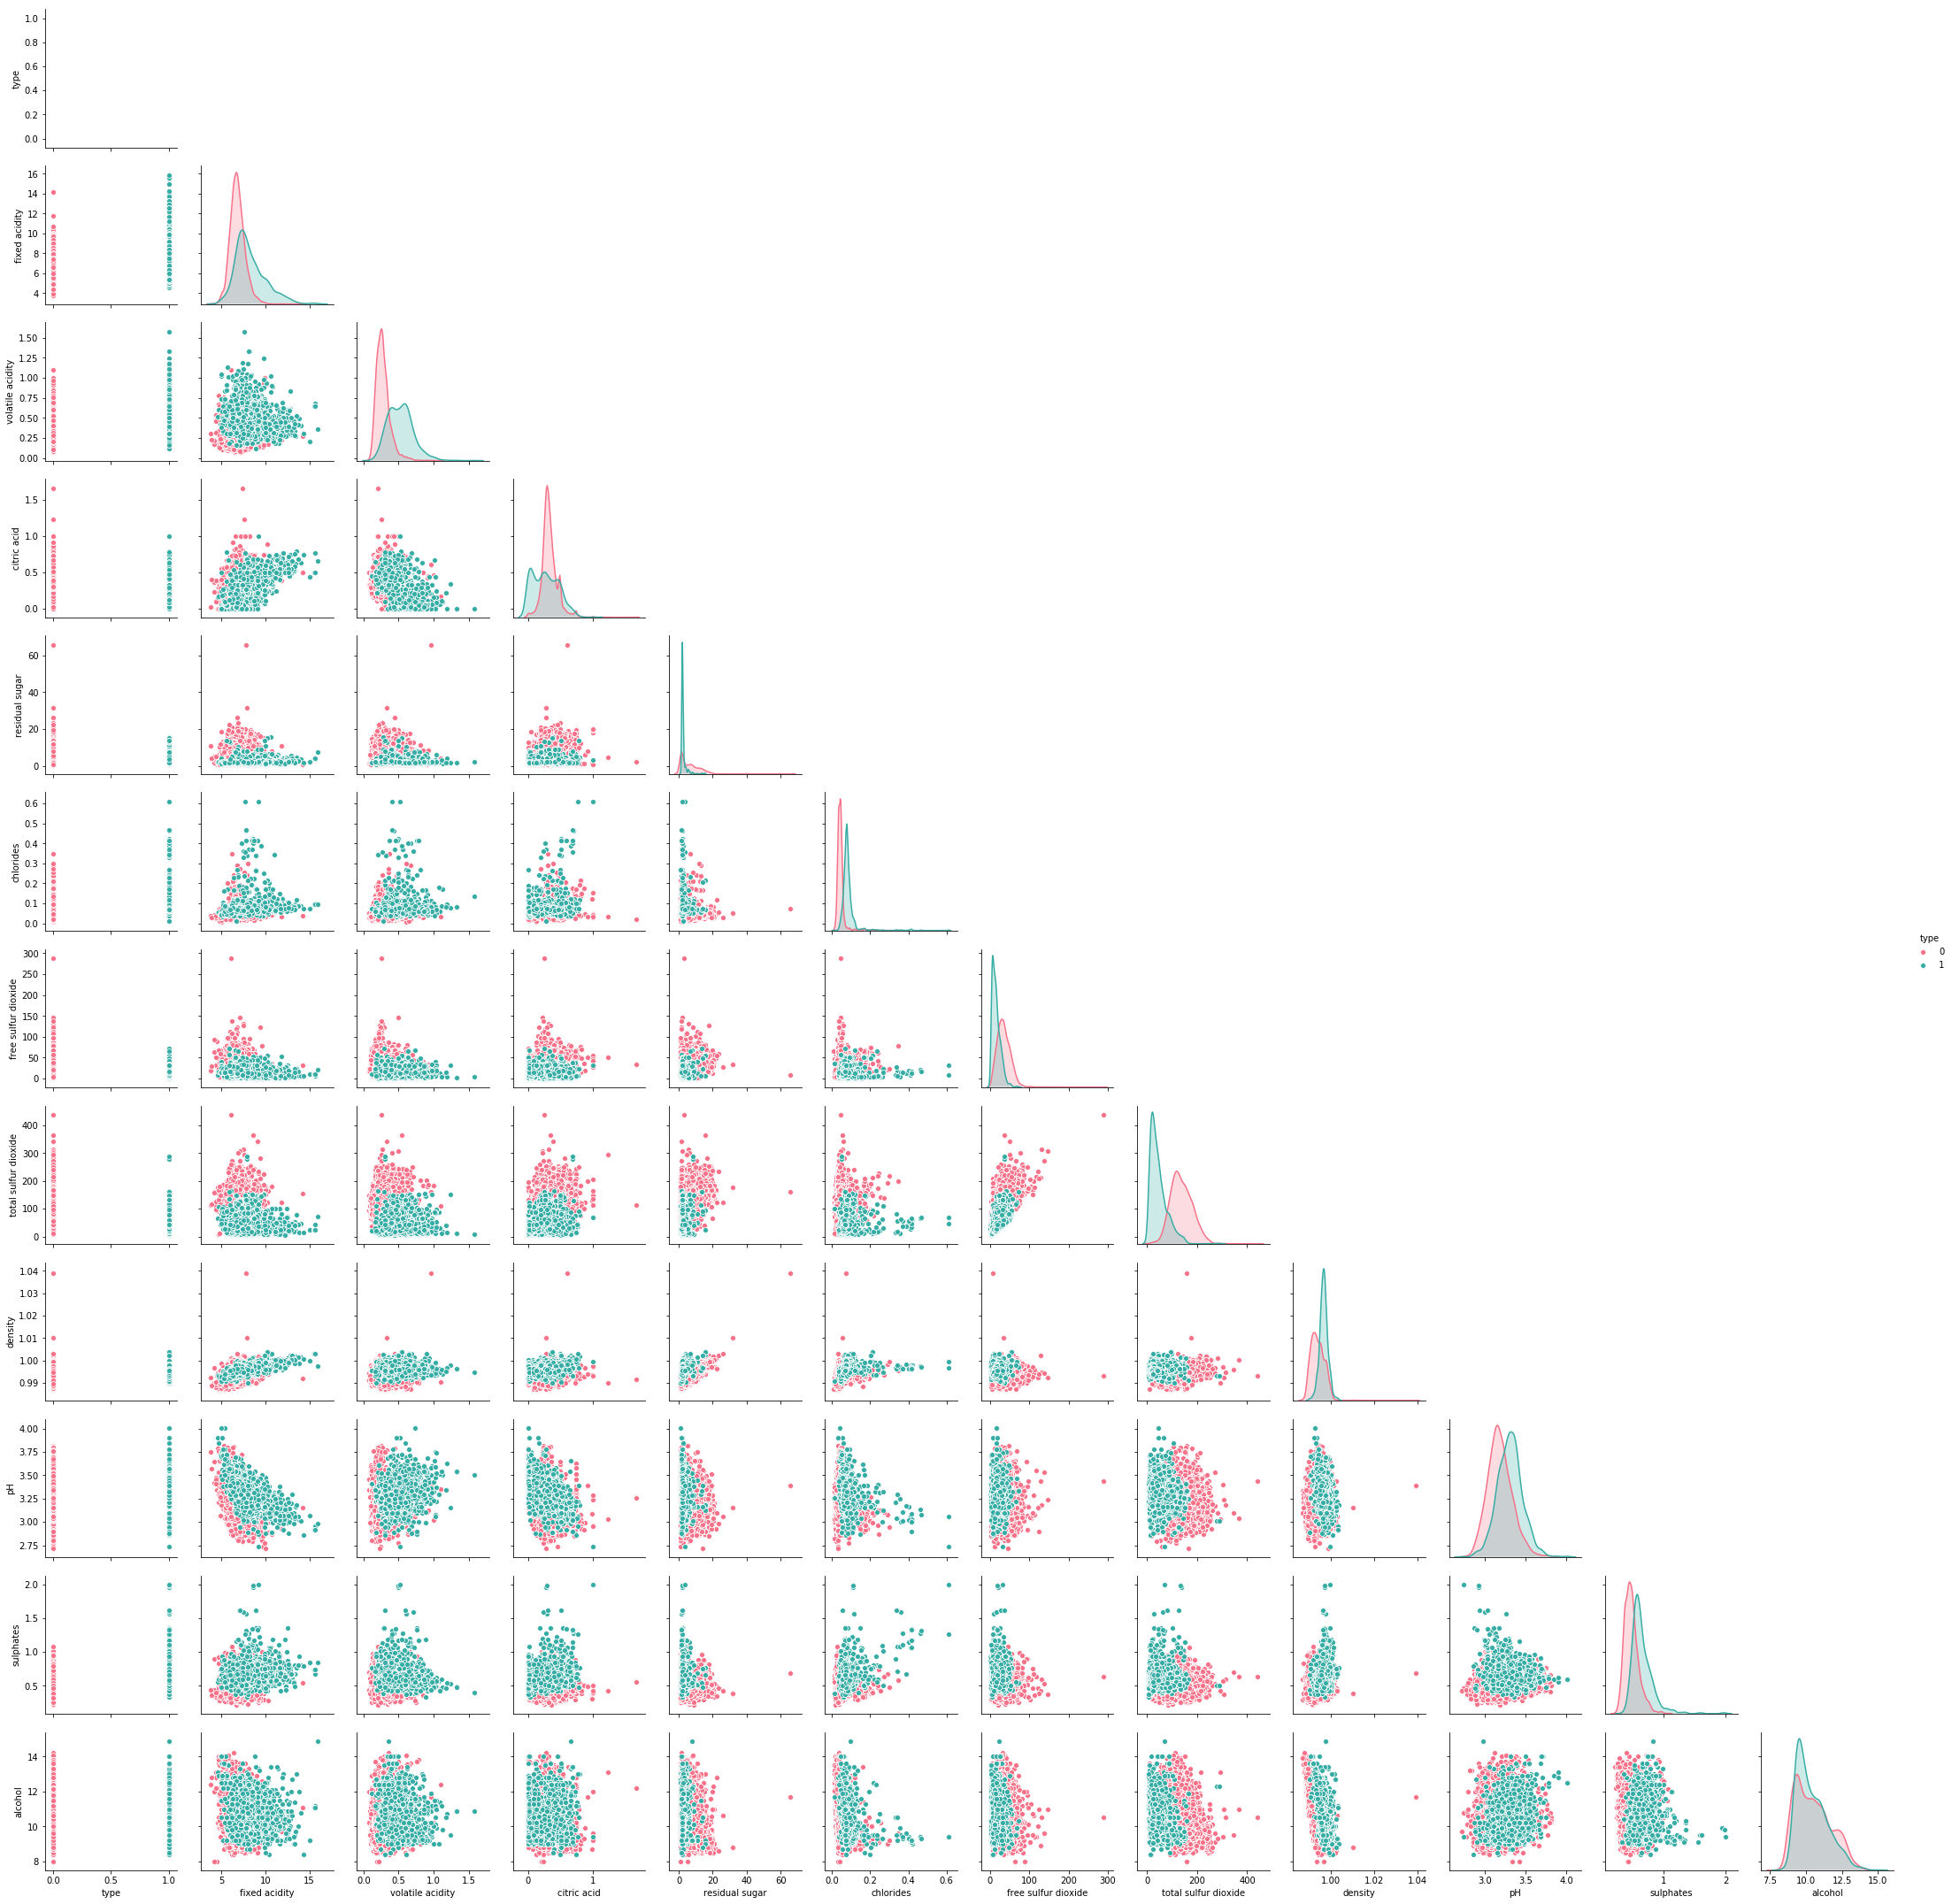

In [5]:
g = sb.pairplot(wineData, hue='type', palette="husl" )
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
# Convert dataframe to numpy array or arrays
wineDataArray = wineData.values
#print(wineDataArray)
wineQualityIndexArray = wineQuality_index.values
#print (wineQualityIndexArray)

## Divide data in traning and test sets
X_train, X_test, y_train, y_test = train_test_split(wineDataArray, wineQualityIndexArray, test_size=0.33, random_state=100)
print (len(X_test))
print (len(X_train))

In [11]:
##Standardize the data 

scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
## Logistic Regression
model=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000)
model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
#Rideg Regression
from sklearn import linear_model
regwine = linear_model.RidgeCV(alphas = [1e-3,1e-2,1e-1,1]).fit(X_train,y_train)
regwine.score(X_test, y_test)
y_pred = model.predict(X_test)

0.2838000657136417

In [9]:
""""## Predict and Check the Model
# use the model to make predictions with the test data
y_pred = model.predict(X_test)
# how did our model perform?
s =model.score(X_test, y_test)
print (s)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-9-5600744dcf1e>, line 10)

In [147]:
''''## Investigating Results of Regularized Logistic Regression

for i in range(1, 11, 2):
    lamda = i / 10.0
   # print (lamda)
    model=LogisticRegression(penalty ='l2', C=lamda, solver='lbfgs', multi_class='auto', max_iter = 2000)
    model.fit(X_train,y_train)

    ## Predict and Check the Model
    # use the model to make predictions with the test data
    y_pred = model.predict(X_test)
    # how did our model perform?
    s =model.score(X_test, y_test)
    #print (s)
    count_misclassified = (y_test != y_pred).sum()
    #print('Misclassified samples: {}'.format(count_misclassified))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Accuracy: {:.2f}'.format(accuracy))



Accuracy: 0.55
Accuracy: 0.55
Accuracy: 0.55
Accuracy: 0.55
Accuracy: 0.55


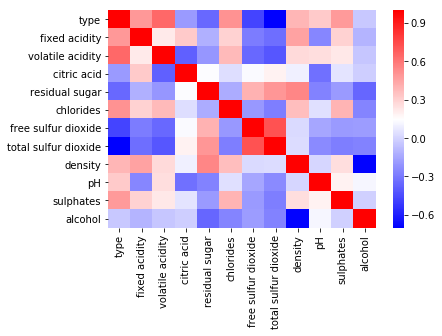

In [148]:
''''wineData_corr = wineData.corr() #correlation matrix, showing correlation between each variable and all the others
wineData.corr().head()
sb.heatmap(wineData_corr, cmap = 'bwr') #heatmap of correlation matrix
###darker colors represent higher correlation, several pairs of variables are highly correlated.

In [149]:
''''import matplotlib.pyplot as plt
## Use PCA to visualize data 
## standardize features of all data
#x = StandardScaler().fit_transform(wineData)
scaler = StandardScaler()
X=scaler.fit_transform(wineDataArray)
print (X)
pca1 = PCA(n_components=2)
#pca1.fit(x)
#print (wineDataArray.shape)
X_reduced = pca1.fit_transform(X)
print (pca1.explained_variance_ratio_)
# plt.plot(np.cumsum(pca1.explained_variance_ratio_))
# plt.xlabel('number of components')
# plt.ylabel('cumulative explained variance')
# plt.show()

#print (X_reduced)
principalDf = pd.DataFrame(data = X_reduced, columns = ['principal component 1', 'principal component 2'])
a = principalDf.values
c=wineQualityIndexArray.reshape(len(wineQualityIndexArray),1)
finalarray= np.concatenate((a, c), axis=1)
finaldf = pd.DataFrame(finalarray, columns =['PC1', 'PC2', 'Quality'])
#print (principalDf)
#print (finalarray)
#print (finalarray.shape)
#print (finaldf)

[[-0.5719307  -0.16778609 -0.42270958 ... -1.35916011 -0.5449872
  -1.41892232]
 [-0.5719307  -0.70715516 -0.2404789  ...  0.50839916 -0.27635393
  -0.83218392]
 [-0.5719307   0.67979387 -0.36196602 ...  0.25939126 -0.61214551
  -0.32926528]
 ...
 [ 1.74846359 -0.70715516  1.03513588 ...  1.25542287  1.46976231
   0.42511267]
 [ 1.74846359 -1.01536606  1.85517396 ...  2.18920251  1.20112905
  -0.24544551]
 [ 1.74846359 -0.93831333 -0.17973534 ...  1.06866695  0.86533746
   0.42511267]]
[0.3176715  0.21069888]


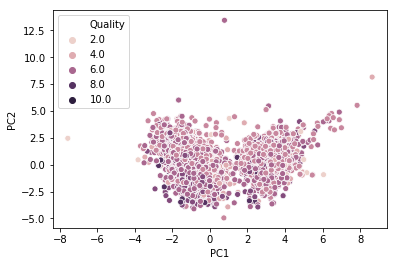

In [150]:
''''sb.scatterplot(x='PC1', y='PC2', hue='Quality', data=finaldf)

In [151]:
''''## Test 2: Use PCA to check if we can reduce dimension

# Make an instance of the Model
pca = PCA(.95)
pca.fit(X_train)

## Get PC Components
print(pca.explained_variance_ratio_)

## Transform data to PC space
Xtrain_pcspace = pca.transform(X_train)
Xtest_pcspace = pca.transform(X_test)

## Logistic Regression
model1=LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 1000)
model1.fit(Xtrain_pcspace,y_train)
## Predict and Check the Model
# use the model to make predictions with the test data
y_pred = model1.predict(Xtest_pcspace)
# how did our model perform?
s =model1.score(Xtest_pcspace, y_test)
print (s)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

[0.32033728 0.21353868 0.12848655 0.07966959 0.05842401 0.05122926
 0.04493507 0.0405024  0.03008288]
0.5480543834974215
Misclassified samples: 964
Accuracy: 0.55


In [ ]:
''''## Trying Ensemle Random Claaifier 

